In [ ]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
#read the csv values inside a variable
df = pd.read_csv("data.csv")

avg_score = df.groupby("Country")["AveragScore"].mean()



This section gets the interquartile ranges to distribute into average, below average and prosperous


In [ ]:
# get the data description and find the quartile ranges specifically q1 sand q3
df['AveragScore'].describe()
# now from this we shall extract q1 and q3
quartile_1 = df['AveragScore'].quantile(0.25)
quartile_3 = df['AveragScore'].quantile(0.75)
#getting the inter quartile range
inter_quartile=quartile_3-quartile_1
#the bounds
lower_bound = quartile_1 - 1.5 * inter_quartile
upper_bound = quartile_3 + 1.5 * inter_quartile

<ipython-input-13-797faa52307b>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




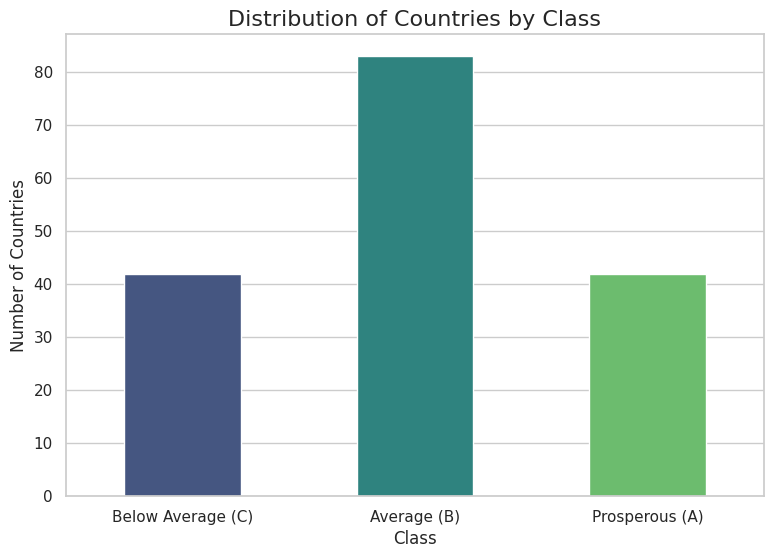

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Bar plot to show the number of countries in each class
plt.figure(figsize=(9, 6))
sns.countplot(x='Class', data=df, palette="viridis", width=0.5)  # Reduce bar width cuz ut actually looked awful lol

# Adding labels and title
plt.title('Distribution of Countries by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

# Show plot
plt.show()


This plotly code allows an interactive scatter plot to be created where one can see the country according to their average score and how that fares with safety and security for a deeper analysis, if you hover over a co ordinate you can which country is being represented.

In [ ]:
import plotly.express as px

fig = px.scatter(df,
                 x='AveragScore',
                 y='SafetySecurity',
                 color='Class',
                 hover_name='Country',  # This will show the country name on the user hovering over a co ordinate
                 labels={'AveragScore': 'Average Score', 'SafetySecurity': 'Safety and Security'},
                 title='Scatter Plot of Average Score vs Safety and Security')

fig.show()

